In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

In [2]:
df = pd.read_csv(r"D:\ML Reinforcement Project\ipl_matches.csv")

In [20]:
# Display the first few rows
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Data Cleaning

In [21]:
df.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [22]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [26]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [29]:
df_backup = df.copy()

In [3]:
team_replacements = {
    "Rising Pune Supergiant": "Rising Pune Supergiants",
    "Delhi Daredevils": "Delhi Capitals",
}

df['team1'] = df['team1'].replace(team_replacements)
df['team2'] = df['team2'].replace(team_replacements)

In [4]:
if 'season' in df.columns and df['season'].dtype == 'object':
    df['season'] = df['season'].str.extract(r'(\d+)', expand=False).astype(int)

In [5]:
# Replacment
df.loc[(df['result'] == 'no result') & (df['winner'].isnull()), 'winner'] = 'No Result'
df['city'] = df['city'].fillna(df['city'].mode()[0])
df.loc[(df['result'] == 'no result') & (df['player_of_match'].isnull()), 'player_of_match'] = 'No Award'

In [36]:
#Droping un-necessary column
df.drop(['date', 'umpire1', 'umpire2', 'umpire3'], axis=1, errors='ignore', inplace=True)

In [37]:
df.isnull().sum()

id                 0
Season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [6]:
df['is_toss_winner'] = (df['toss_winner'] == df['team1']).astype(int)
df['batting_first'] = (df['toss_decision'] == 'bat').astype(int)

In [7]:
# Separate target before encoding
target = df['winner']
df.drop(['winner'], axis=1, inplace=True)

#### Label Encoder and Hot Label Encoder

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [10]:
# Encode the target
le = LabelEncoder()
y = le.fit_transform(target)
X = df

#### Checking for Outlier's

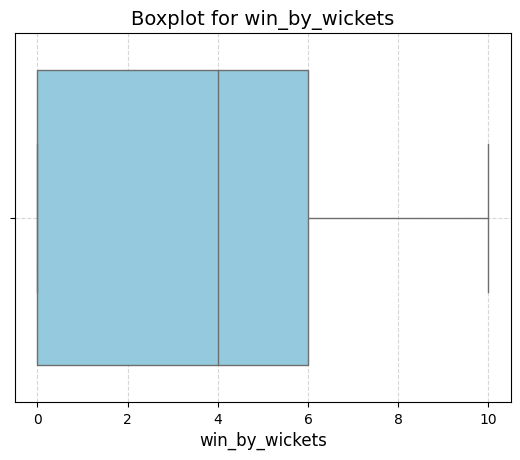

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color (e.g., light blue)
sns.boxplot(x=df['win_by_wickets'], color='skyblue')
plt.title('Boxplot for win_by_wickets', fontsize=14)
plt.xlabel('win_by_wickets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

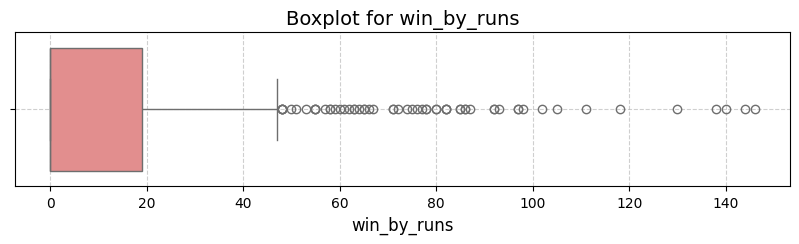

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))  # Adjust size for a horizontal boxplot
sns.boxplot(x=df['win_by_runs'], color='lightcoral')  # You can change color here
plt.title('Boxplot for win_by_runs', fontsize=14)
plt.xlabel('win_by_runs', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Exploratory Data Analysis (EDA)

#### Univariate Analysis

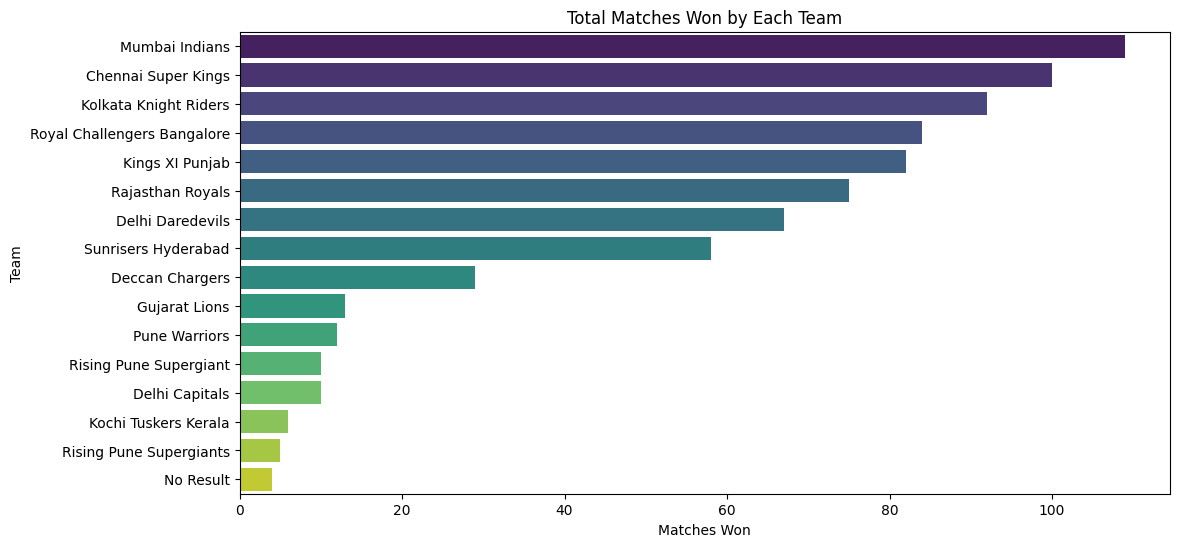

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(
    y='winner', 
    data=df, 
    order=df['winner'].value_counts().index,
    palette='viridis'  
)
plt.title('Total Matches Won by Each Team')
plt.xlabel('Matches Won')
plt.ylabel('Team')
plt.show()

Text(0, 0.5, 'Number of Matches')

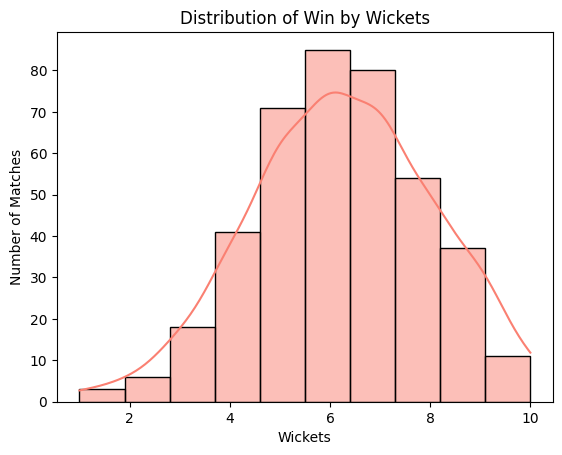

In [43]:
# Distribution of win by wickets (when team chases)
plt.subplot(1, 1, 1)
sns.histplot(df[df['win_by_wickets'] > 0]['win_by_wickets'], bins=10, color='salmon', kde=True)
plt.title('Distribution of Win by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Number of Matches')

Text(0, 0.5, 'Count')

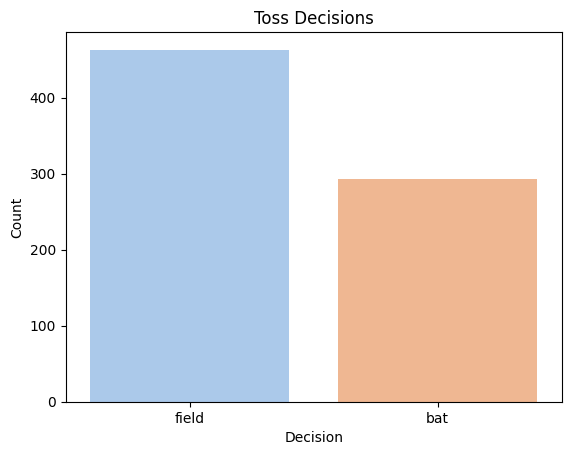

In [5]:
#  Toss decision counts
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='toss_decision', hue='toss_decision', palette='pastel', legend=False)
plt.title('Toss Decisions')
plt.xlabel('Decision')
plt.ylabel('Count')

([<matplotlib.axis.XTick at 0x1ff0dd39f90>,
 [Text(0, 0, 'Toss & Match Won'), Text(1, 0, 'Only Toss Won')])

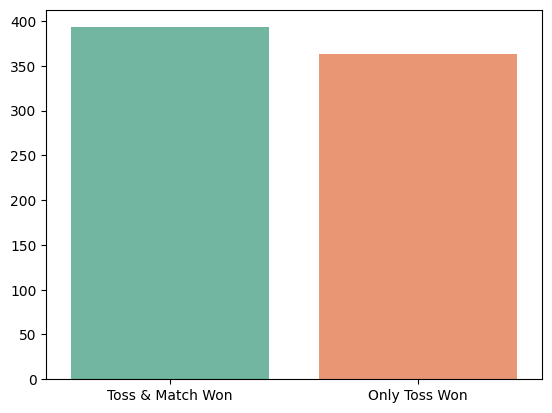

In [45]:
# Correlation between toss winner and match winner

toss_match_winner = df[df['winner'].notna()].copy()
toss_match_winner['toss_win_match_win'] = toss_match_winner['toss_winner'] == toss_match_winner['winner']
toss_match_counts = toss_match_winner['toss_win_match_win'].value_counts()

plt.subplot(1, 1, 1)
sns.barplot(
    x=[0, 1],  # Just positions to avoid duplicate x-axis labels
    y=toss_match_counts.values,
    hue=toss_match_counts.index.map({True: 'Toss & Match Won', False: 'Only Toss Won'}),
    palette={'Toss & Match Won': '#66c2a5', 'Only Toss Won': '#fc8d62'},
    dodge=False,
    legend=False
)
plt.xticks([0, 1], ['Toss & Match Won', 'Only Toss Won'])  # Set actual category labels

#### Bivariate Analysis

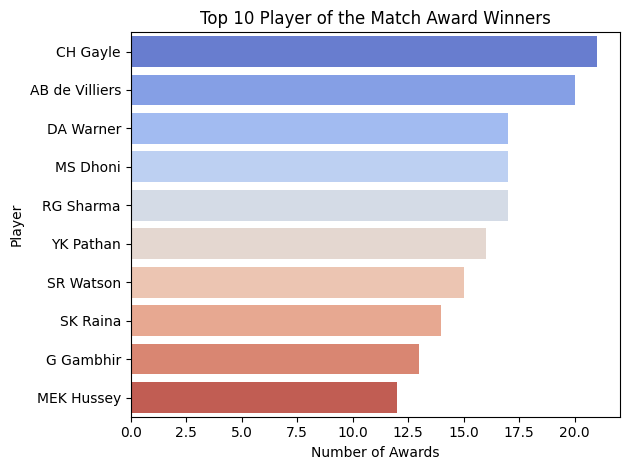

In [46]:
# Top 10 players with most Player of the Match awards
top_players = df['player_of_match'].value_counts().head(10)
plt.subplot(1, 1, 1)
sns.barplot(
    y=top_players.index,
    x=top_players.values,
    hue=top_players.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Top 10 Player of the Match Award Winners')
plt.xlabel('Number of Awards')
plt.ylabel('Player')

plt.tight_layout()
plt.show()

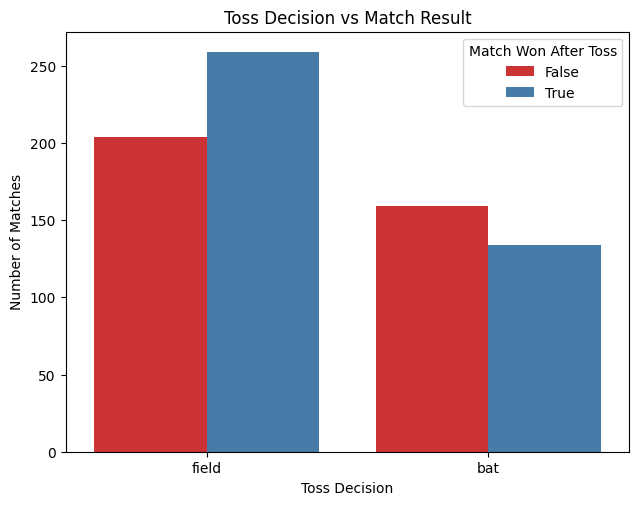

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the DataFrame to work with
df_bivariate = df[df['winner'].notna()].copy()
df_bivariate['toss_win'] = df_bivariate['toss_winner'] == df_bivariate['winner']

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.countplot(data=df_bivariate, x='toss_decision', hue='toss_win', palette='Set1')
plt.title('Toss Decision vs Match Result')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(title='Match Won After Toss')

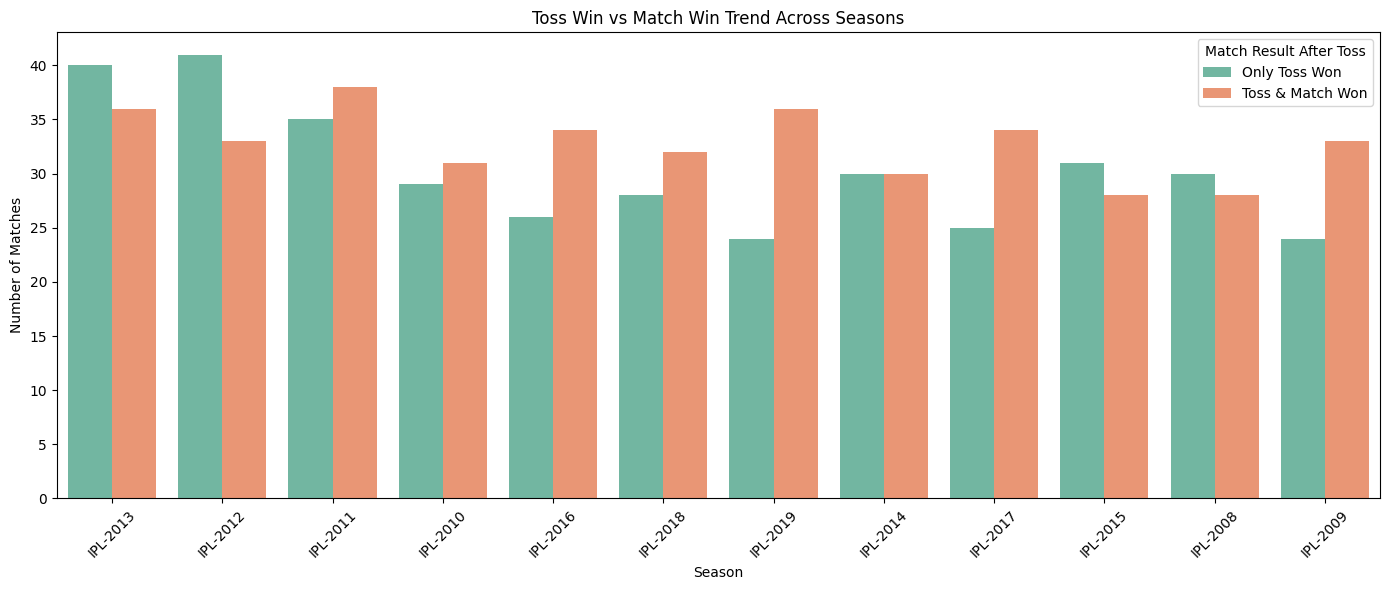

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
df_bivariate['toss_win_label'] = df_bivariate['toss_win'].map({
    True: 'Toss & Match Won',
    False: 'Only Toss Won'
})

season_order = df_bivariate['Season'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(14, 6))
sns.countplot(
    data=df_bivariate,
    x='Season',
    hue='toss_win_label',
    palette='Set2',
    order=season_order  
)

plt.title('Toss Win vs Match Win Trend Across Seasons')
plt.ylabel('Number of Matches')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Match Result After Toss')
plt.tight_layout()
plt.show()

#### Multivariate Analysis

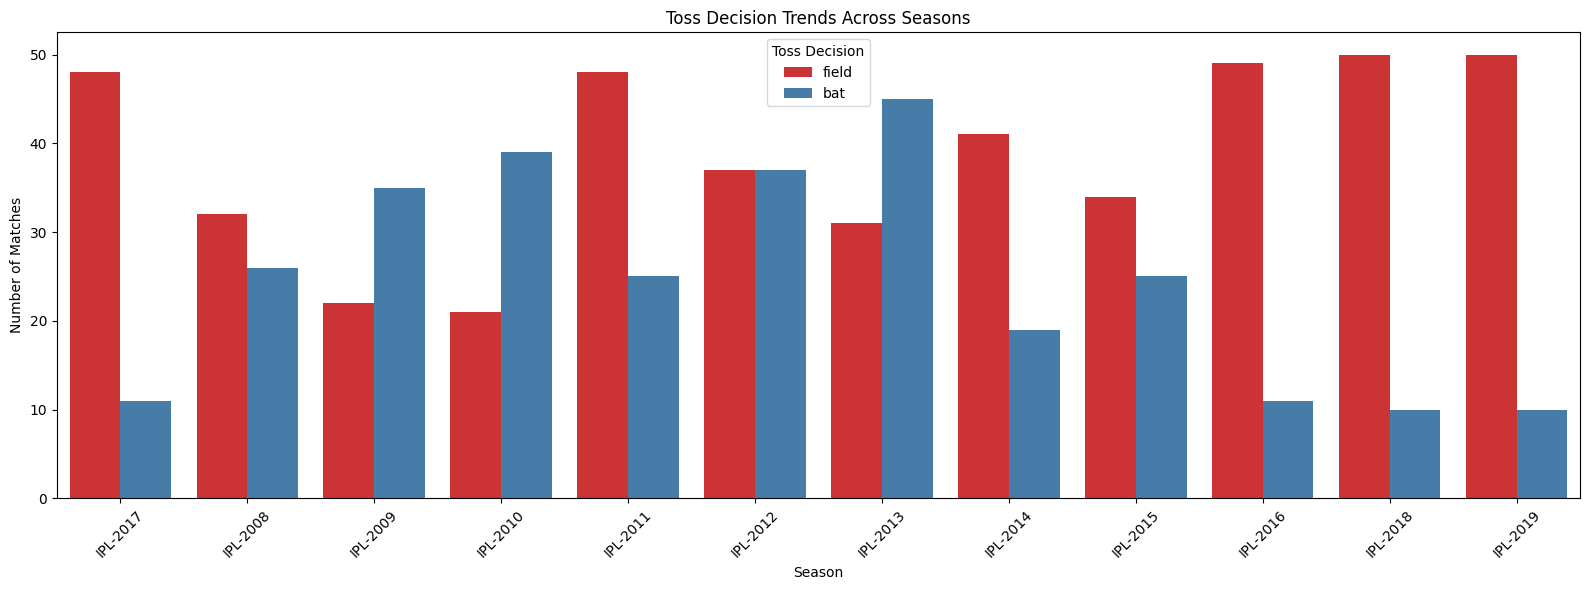

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure columns are mapped/clean
df_bivariate['toss_win_label'] = df_bivariate['toss_win'].map({
    True: 'Toss & Match Won',
    False: 'Only Toss Won'
})
plt.figure(figsize=(16, 6))
sns.countplot(
    data=df_bivariate,
    x='Season',
    hue='toss_decision',
    palette='Set1'
)
plt.title('Toss Decision Trends Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

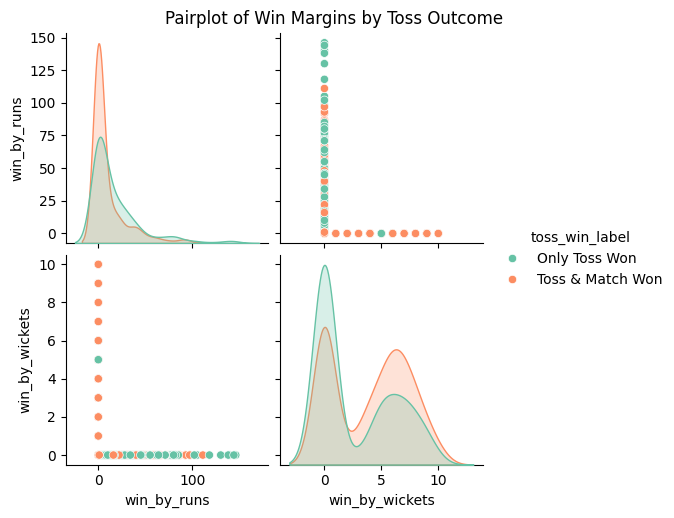

In [50]:
sns.pairplot(
    df_bivariate,
    vars=['win_by_runs', 'win_by_wickets'],
    hue='toss_win_label',
    palette='Set2'
)
plt.suptitle('Pairplot of Win Margins by Toss Outcome', y=1.02)
plt.show()

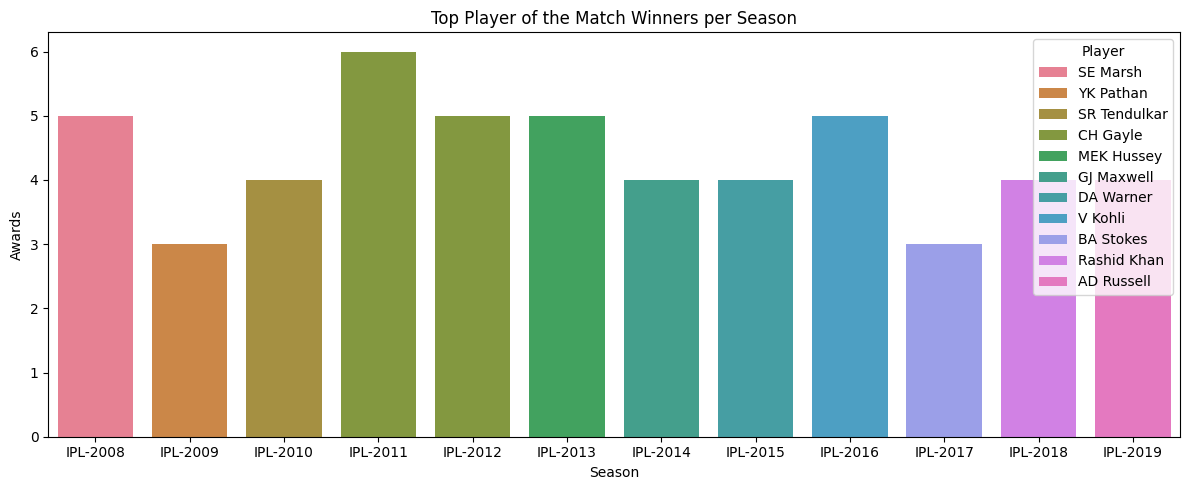

In [51]:
top_players_per_season = df_bivariate.groupby(['Season', 'player_of_match']).size().reset_index(name='count')
top_players = top_players_per_season.sort_values(['Season', 'count'], ascending=[True, False]).groupby('Season').head(1)

plt.figure(figsize=(12, 5))
sns.barplot(x='Season', y='count', hue='player_of_match', data=top_players, dodge=False)
plt.title('Top Player of the Match Winners per Season')
plt.ylabel('Awards')
plt.xlabel('Season')
plt.legend(title='Player')
plt.tight_layout()
plt.show()

#### Models Training

In [11]:
### using StratifiedShuffleSplit to train and model efficiently and equally

Stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in Stratified.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import pandas as pd

# Dictionary to store model results
results = {}
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Loop through each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data only for models that require it
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

print("\n Model Performance Summary:\n")
print(results_df)


Training Logistic Regression...
Logistic Regression Accuracy: 0.7566
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.80      0.67      0.73         6
           2       0.00      0.00      0.00         2
           3       0.67      0.46      0.55        13
           4       1.00      0.33      0.50         3
           5       0.75      0.75      0.75        16
           6       0.50      1.00      0.67         1
           7       0.79      0.79      0.79        19
           8       0.82      0.82      0.82        22
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         2
          11       0.81      0.87      0.84        15
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         1
          14       0.67      0.94      0.78        17
          15       0.90      0.75      0.

In [60]:
best_model_name = results_df.index[0]
print(f"\nBest Performing Model: {best_model_name}")


Best Performing Model: XGBoost


In [61]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    param_grid=xgb_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 150]},
             verbose=1)

In [62]:
# Retrieve the best XGBoost model after tuning
best_xgb_model = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

Best XGBoost Parameters: {'max_depth': 3, 'n_estimators': 100}


#### Checking the Tuned Model

In [63]:
# Predict on test data
xgb_preds = best_xgb_model.predict(X_test)

# Evaluate performance
xgb_acc = accuracy_score(y_test, xgb_preds)
print(f"\nTuned XGBoost Accuracy: {xgb_acc:.4f}")
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


Tuned XGBoost Accuracy: 0.9474
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         2
           3       0.91      0.77      0.83        13
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       0.88      1.00      0.94        15
          12       0.67      1.00      0.80         2
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        17
          15       0.86      1.00      0.92        12

    accuracy            

In [64]:
# Save the tuned XGBoost model
joblib.dump(best_xgb_model, 'best_xgboost_model.pkl')

['best_xgboost_model.pkl']

#### Model Comparision

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

linear_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

In [69]:
models = {
    "Linear Regression": linear_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

In [70]:
!pip install xgboost

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": linear_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "CV R2 Score (Mean)": np.mean(scores),
        "Test R2 Score": r2,
        "Test MSE": mse
    }

import pandas as pd
results_df = pd.DataFrame(results).T.sort_values(by="Test R2 Score", ascending=False)
print(results_df)

                   CV R2 Score (Mean)  Test R2 Score   Test MSE
XGBoost                      0.773637       0.780498   5.062898
Random Forest                0.730611       0.693407   7.071701
Decision Tree                0.491863       0.545914  10.473684
Linear Regression            0.316310       0.352059  14.945015


In [17]:
#Evaluation metrics (accuracy, precision, recall, etc.)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Model dictionary (assumes models are already defined)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Loop through each model
for name, model in models.items():
    # Use scaled or unscaled data
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted', zero_division=0)
    recall = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)

    # Append to results
    metrics['Model'].append(name)
    metrics['Accuracy'].append(round(accuracy, 3))
    metrics['Precision'].append(round(precision, 3))
    metrics['Recall'].append(round(recall, 3))
    metrics['F1 Score'].append(round(f1, 3))

# Create DataFrame
results_df = pd.DataFrame(metrics)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Display
print(results_df.to_string(index=False))

              Model  Accuracy  Precision  Recall  F1 Score
            XGBoost     0.934      0.937   0.934     0.931
      Decision Tree     0.829      0.827   0.829     0.824
      Random Forest     0.763      0.771   0.763     0.753
Logistic Regression     0.671      0.663   0.671     0.653
                SVM     0.546      0.507   0.546     0.484
                KNN     0.461      0.522   0.461     0.448


In [16]:
import xgboost as xgb

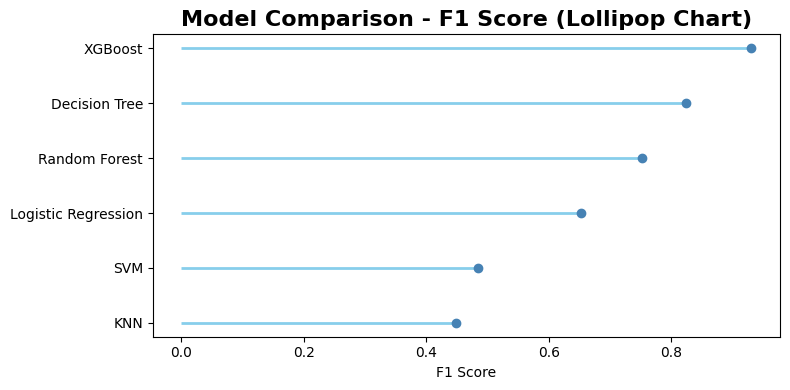

In [25]:
import matplotlib.pyplot as plt

# Sort the DataFrame by F1 Score descending
results_sorted = results_df.sort_values(by='F1 Score', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
plt.hlines(y=results_sorted['Model'], xmin=0, xmax=results_sorted['F1 Score'], color='skyblue', linewidth=2)
plt.plot(results_sorted['F1 Score'], results_sorted['Model'], "o", color='steelblue')

# Title and labels
plt.title('Model Comparison - F1 Score (Lollipop Chart)', fontsize=16, weight='bold')
plt.xlabel('F1 Score')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Invert y-axis to show highest score at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()